In [1]:
%matplotlib inline
import h5py
import numpy as np
import os
from UG2.utils import data as data_utils
from UG2.utils import image as image_utils
from UG2.config import Config
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.autograd import Variable
import scipy.ndimage as im
import time
from UG2 import main

In [2]:
destination_path     = "/data/UG2_data/h5Files/"
data_source_path     = "/data/UG2_data/datasets/BSD100_SR/image_SRF_2/"

In [3]:
## create blurred-dataset 
patch_size          = np.array([64, 64])
source_name_files   = []
kernel_blurring_flag= True
num_images          = 100
testing_fraction    = 0.9
scale_factor        = 2
flags               = [1, 1]
gaussian_blur_range = [0.1, 2.5]
motion_blur_range   = [0, 5]
nTK                 = 4
image_format        = ".png" 

In [4]:
dataset_name        = "BSDBlurred"+"_nTK_"+str(nTK)+ "_flag_" + "_".join([str(f) for f in flags])
source_name_files   = []

for i in range(1,num_images+1):
    source_name_files.append("img_"+"%03d"%i+"_SRF_2_HR")

blur_parameters = {}

blur_parameters["nTK"]                  = nTK
blur_parameters["scale_factor"]         = scale_factor
blur_parameters["flags"]                = flags
blur_parameters["gaussian_blur_range"]  = gaussian_blur_range
blur_parameters["motion_blur_range"]    = motion_blur_range

data_utils.create_dataset(data_source_path, source_name_files, image_format, destination_path, dataset_name, num_images, patch_size, testing_fraction, blur_parameters)

data of shape  (539, 3, 64, 64) and label of shape  (539, 3, 128, 128)  created of type float64


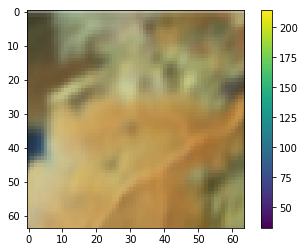

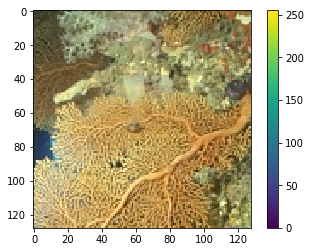

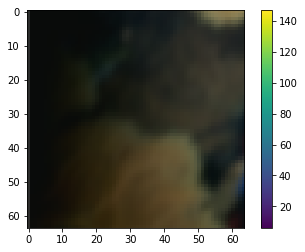

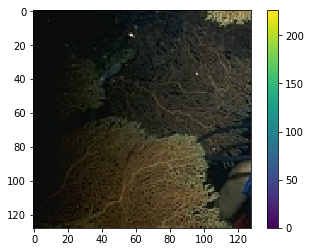

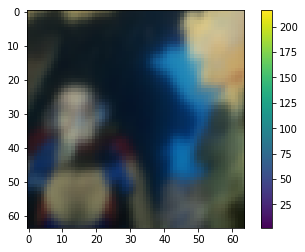

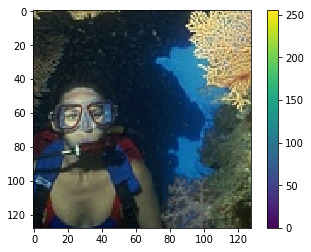

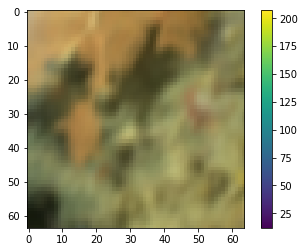

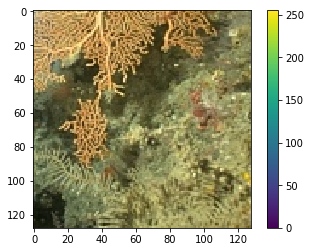

In [8]:
with h5py.File(os.path.join(destination_path, dataset_name + "testing.h5"),'r') as file:
    label = np.array(file["label"])
    data  = np.array(file["data"])
    
plt.figure()
plt.imshow(np.transpose(data[1,:].astype(np.uint8), (1, 2, 0)))
plt.colorbar()
plt.figure()
plt.imshow(np.transpose(label[1,:].astype(np.uint8), (1, 2, 0)))
plt.colorbar()
plt.figure()
plt.imshow(np.transpose(data[2,:].astype(np.uint8), (1, 2, 0)))
plt.colorbar()
plt.figure()
plt.imshow(np.transpose(label[2,:].astype(np.uint8), (1, 2, 0)))
plt.colorbar()
plt.figure()
plt.imshow(np.transpose(data[3,:].astype(np.uint8), (1, 2, 0)))
plt.colorbar()
plt.figure()
plt.imshow(np.transpose(label[3,:].astype(np.uint8), (1, 2, 0)))
plt.colorbar()
plt.figure()
plt.imshow(np.transpose(data[4,:].astype(np.uint8), (1, 2, 0)))
plt.colorbar()
plt.figure()
plt.imshow(np.transpose(label[4,:].astype(np.uint8), (1, 2, 0)))
plt.colorbar()
